A notebook to visualize some of the test systems in the C++ test code in `Code/GraphMol/RGroupDecomposition/testRGroupDecomp.cpp`

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
from rdkit.Chem.rdRGroupDecomposition import RGroupDecomposition, RGroupDecompositionParameters, \
   RGroupMatching, RGroupScore, RGroupLabels, RGroupCoreAlignment
import pandas as pd
from rdkit.Chem import PandasTools
from collections import OrderedDict
from IPython.display import HTML
from rdkit import rdBase
from io import StringIO
from rdkit.Chem import Draw

rdBase.DisableLog("rdApp.debug")

### testSDFGRoupMultiCoreNoneShouldMatch

Cores, compounds and python code 

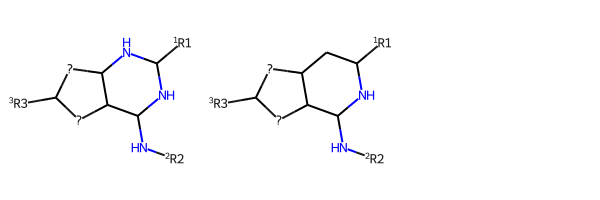

In [2]:
sdcores = """
Mrv1813 05061918272D          

 13 14  0  0  0  0            999 V2000
   -1.1505    0.0026    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1505   -0.8225    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360   -1.2350    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784   -0.8225    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784    0.0026    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360    0.4151    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9354    0.2575    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4202   -0.4099    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9354   -1.0775    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    0.9907   -1.2333    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.4360    1.2373    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.2784    1.6497    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -3.2452   -0.4098    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  6  1  1  0  0  0  0
  1  7  1  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  9  2  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 10  1  0  0  0  0
  5  6  1  0  0  0  0
  6 11  1  0  0  0  0
  7  8  1  0  0  0  0
  8 13  1  0  0  0  0
  8  9  1  0  0  0  0
 11 12  1  0  0  0  0
M  RGP  3  10   1  12   2  13   3
M  END
$$$$

  Mrv1813 05061918272D          

 13 14  0  0  0  0            999 V2000
    6.9524    0.1684    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9524   -0.6567    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.6668   -1.0692    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813   -0.6567    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813    0.1684    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.6668    0.5809    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1674    0.4233    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    5.6827   -0.2441    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.1674   -0.9117    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
    9.0935   -1.0675    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    7.6668    1.4031    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    8.3813    1.8155    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
    4.8576   -0.2440    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  6  1  1  0  0  0  0
  1  7  1  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  9  2  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 10  1  0  0  0  0
  5  6  1  0  0  0  0
  6 11  1  0  0  0  0
  7  8  1  0  0  0  0
  8 13  1  0  0  0  0
  8  9  1  0  0  0  0
 11 12  1  0  0  0  0
M  RGP  3  10   1  12   2  13   3
M  END
$$$$)CTAB"""

supplier = Chem.SDMolSupplier()
supplier.SetData(sdcores)
cores = [x for x in supplier]
for core in cores:
    AllChem.Compute2DCoords(core)
Draw.MolsToGridImage(cores)

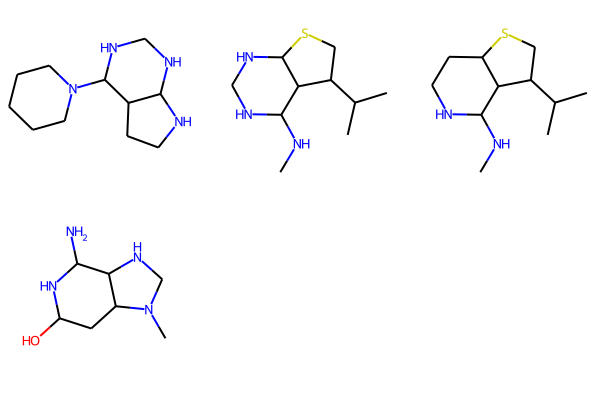

In [3]:
sdmols="""CTAB(
  Mrv1813 05061918322D          

 15 17  0  0  0  0            999 V2000
    0.1742    0.6899    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886    0.2774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -0.5476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -0.9601    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -1.7851    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -2.1976    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8886   -3.0226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1742   -3.4351    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -3.0226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3249   -3.2775    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8099   -2.6101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3249   -1.9426    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -2.1976    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403   -0.5476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5403    0.2774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1 15  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  4 14  1  0  0  0  0
  5  6  1  0  0  0  0
  5 13  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
  9 13  1  0  0  0  0
 10 11  1  0  0  0  0
 11 12  1  0  0  0  0
 12 13  1  0  0  0  0
 14 15  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 14 15  0  0  0  0            999 V2000
    6.4368    0.3002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -0.1123    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -0.9373    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4368   -1.3498    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.4368   -2.1748    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.7223   -2.5873    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0078   -2.1748    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2232   -2.4297    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    3.7383   -1.7623    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2232   -1.0949    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9683   -0.3102    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1613   -0.1387    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5203    0.3029    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.0078   -1.3498    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  7 14  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
 10 11  1  0  0  0  0
 10 14  1  0  0  0  0
 11 13  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 14 15  0  0  0  0            999 V2000
    0.8289   -7.9643    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144   -8.3768    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144   -9.2018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8289   -9.6143    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.8289  -10.4393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1144  -10.8518    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6000  -10.4393    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3847  -10.6942    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8696  -10.0268    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3847   -9.3593    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6396   -8.5747    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4466   -8.4032    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0876   -7.9616    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6000   -9.6143    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  7  8  1  0  0  0  0
  7 14  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
 10 11  1  0  0  0  0
 10 14  1  0  0  0  0
 11 13  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$

  Mrv1813 05061918322D          

 12 13  0  0  0  0            999 V2000
    5.3295   -8.1871    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5844   -7.4025    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.0995   -6.7351    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5844   -6.0676    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.3690   -6.3226    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -5.9101    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -5.0851    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.7980   -6.3226    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.7980   -7.1476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.5124   -7.5601    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.0835   -7.5601    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.3690   -7.1476    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  2 12  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  5 12  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  1  0  0  0  0
  6  8  1  0  0  0  0
  8  9  1  0  0  0  0
  9 10  1  0  0  0  0
  9 11  1  0  0  0  0
 11 12  1  0  0  0  0
M  END
$$$$)CTAB"""
supplier = Chem.SDMolSupplier()
supplier.SetData(sdmols)
mols = [x for x in supplier]
for mol in mols:
    AllChem.Compute2DCoords(mol)
Draw.MolsToGridImage(mols)

,Core,R1,R2,R4,R5,R6,mol
0,,,,,,,
1,,,,,,,
2,,,,,,,
3,,,,,,,

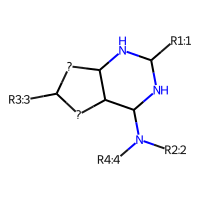
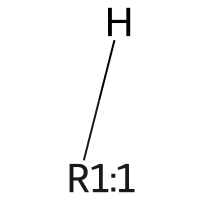
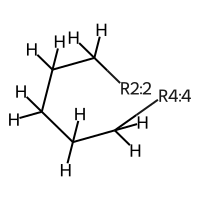
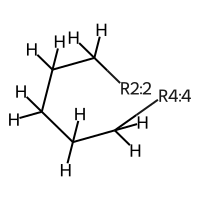
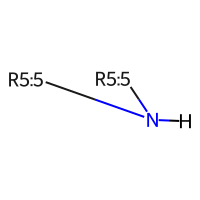
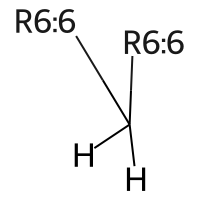
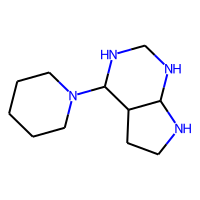
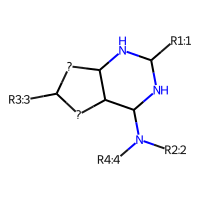
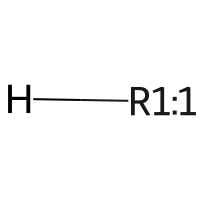
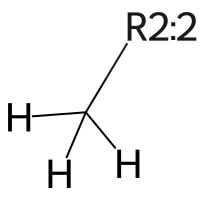
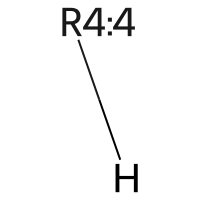
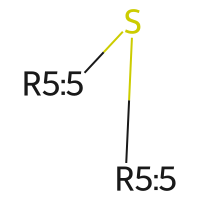
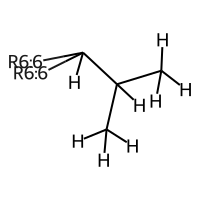
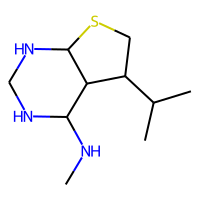
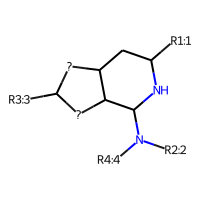
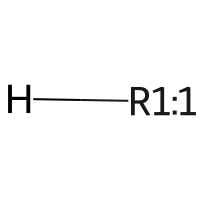
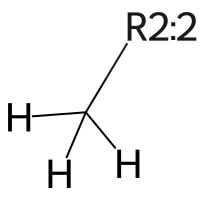
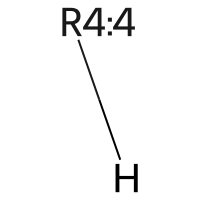
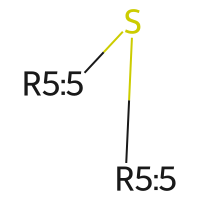
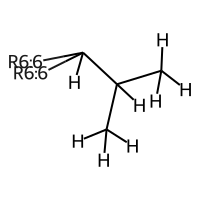
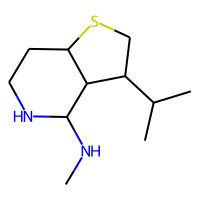
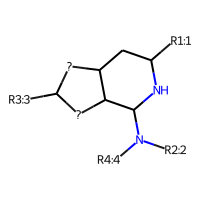
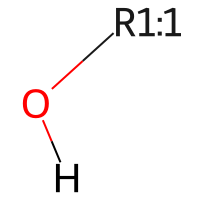
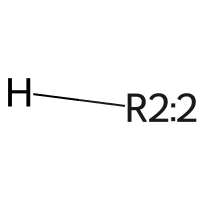
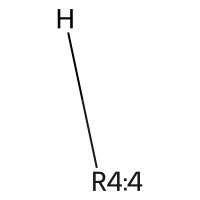
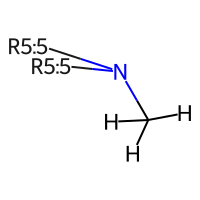
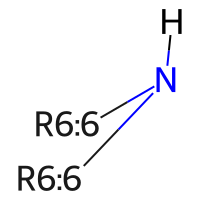
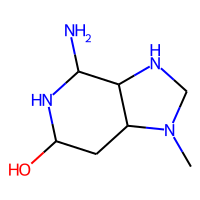

In [4]:
options = RGroupDecompositionParameters()
options.onlyMatchAtRGroups = False
options.removeHydrogensPostMatch = False
decomp = RGroupDecomposition(cores, options)
for mol in mols:
    decomp.Add(mol)
decomp.Process()
cols= decomp.GetRGroupsAsColumns()
cols['mol'] = mols
for c in cols['Core']:
     AllChem.Compute2DCoords(c)
Draw.MolsToGridImage(cols['Core'])

df = pd.DataFrame(cols);
PandasTools.ChangeMoleculeRendering(df)
HTML(df.to_html())


In [5]:
rows = decomp.GetRGroupsAsRows();
for i, r in enumerate(rows):
    labels = ['{}:{}'.format(l, Chem.MolToSmiles(r[l])) for l in r]
    print('{} {}'.format(str(i+1), ' '.join(labels)))

1 Core:N1C(N([*:2])[*:4])C2C(NC1[*:1])[*:5]C([*:3])[*:6]2 R1:[H][*:1] R2:[H]C([H])(C([H])([H])C([H])([H])[*:2])C([H])([H])C([H])([H])[*:4] R4:[H]C([H])(C([H])([H])C([H])([H])[*:2])C([H])([H])C([H])([H])[*:4] R5:[H]N([*:5])[*:5] R6:[H]C([H])([*:6])[*:6]
2 Core:N1C(N([*:2])[*:4])C2C(NC1[*:1])[*:5]C([*:3])[*:6]2 R1:[H][*:1] R2:[H]C([H])([H])[*:2] R4:[H][*:4] R5:S([*:5])[*:5] R6:[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([*:6])[*:6]
3 Core:C1C([*:1])NC(N([*:2])[*:4])C2C1[*:5]C([*:3])[*:6]2 R1:[H][*:1] R2:[H]C([H])([H])[*:2] R4:[H][*:4] R5:S([*:5])[*:5] R6:[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([*:6])[*:6]
4 Core:C1C([*:1])NC(N([*:2])[*:4])C2C1[*:5]C([*:3])[*:6]2 R1:[H]O[*:1] R2:[H][*:2] R4:[H][*:4] R5:[H]C([H])([H])N([*:5])[*:5] R6:[H]N([*:6])[*:6]


### testMultiCorePreLabelled

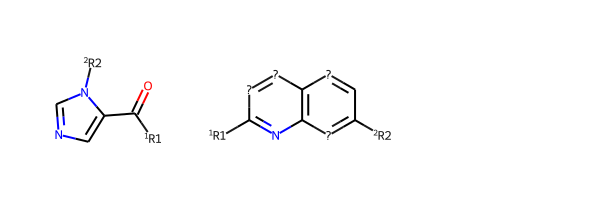

In [6]:
sdcores = """CTAB(
     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    1.1100   -1.3431    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5225   -0.6286    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9705   -0.0156    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2168   -0.3511    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.3029   -1.1716    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1419    0.7914    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5289    1.3431    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.9266    1.0463    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -0.4976    0.0613    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  1  0
  1  5  2  0
  3  6  1  0
  6  7  2  0
  6  8  1  0
  4  9  1  0
M  RGP  2   8   1   9   2
V    8 *
V    9 *
M  END
$$$$

     RDKit          2D

 12 13  0  0  0  0  0  0  0  0999 V2000
   -6.5623    0.3977    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
   -5.8478   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1333    0.3977    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4188   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4188   -0.8397    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1333   -1.2522    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -5.8478   -0.8397    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7044   -1.2522    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7044    0.3977    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9899   -0.0147    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9899   -0.8397    0.0000 A   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2754    0.3978    0.0000 R#  0  0  0  0  0  0  0  0  0  0  0  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  2  3  2  0
  2  7  1  0
  9 10  2  0
 10 11  1  0
  8 11  2  0
  8  5  1  0
  4  9  1  0
 10 12  1  0
  1  2  1  0
M  RGP  2   1   2  12   1
V    1 *
V   12 *
M  END
$$$$
)CTAB"""

supplier = Chem.SDMolSupplier()
supplier.SetData(sdcores)
cores = [x for x in supplier]
for core in cores:
    AllChem.Compute2DCoords(core)
Draw.MolsToGridImage(cores)

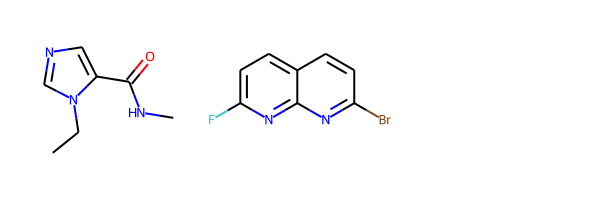

In [7]:
smiles = ["CNC(=O)C1=CN=CN1CC", "Fc1ccc2ccc(Br)nc2n1"]
mols = [Chem.MolFromSmiles(s) for s in smiles]
Draw.MolsToGridImage(mols)

In [8]:

def decomp(options):
    options.onlyMatchAtRGroups = True
    options.removeHydrogensPostMatch = True
    decomp = RGroupDecomposition(cores, options)
    for mol in mols:
        decomp.Add(mol)
    decomp.Process()
    cols = decomp.GetRGroupsAsColumns()
    return cols

def show_decomp(cols):
    cols['mol'] = mols
    df = pd.DataFrame(cols);
    PandasTools.ChangeMoleculeRendering(df)
    return HTML(df.to_html())

# for when we can't display structures ("non-ring aromatic")
def show_decomp_smiles(cols):
    cols['mol'] = mols
    for c in cols:
        cols[c] = ['{}:{}'.format(c, Chem.MolToSmiles(m)) for m in cols[c]]
    df = pd.DataFrame(cols);
    PandasTools.ChangeMoleculeRendering(df)
    return HTML(df.to_html())


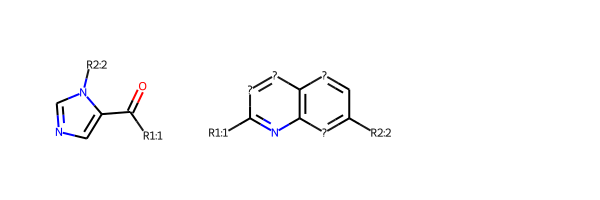

In [9]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.MCS
cols = decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

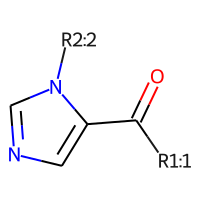
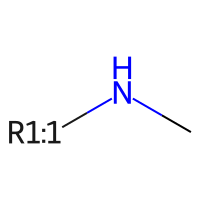
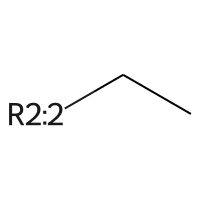
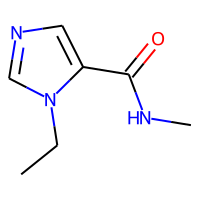
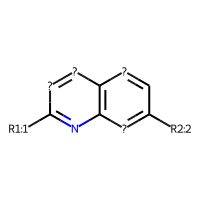
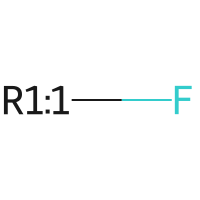
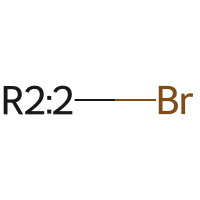
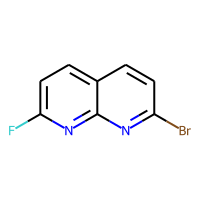

In [10]:
show_decomp(cols)

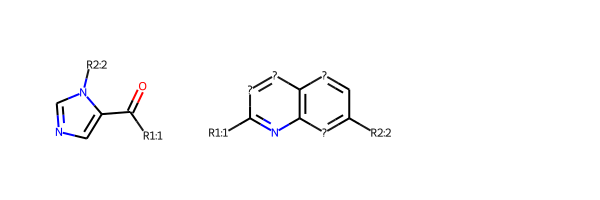

In [11]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.MDLRGroupLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.MCS
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

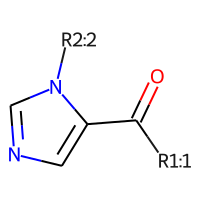
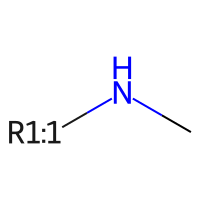
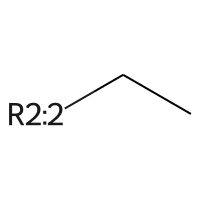
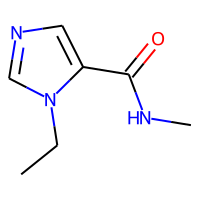
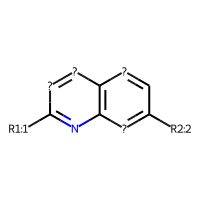
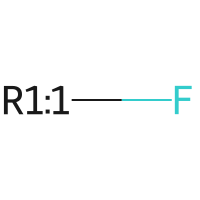
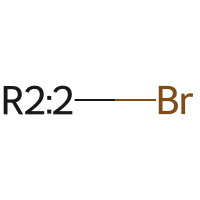
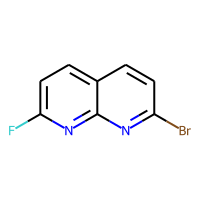

In [12]:
show_decomp(cols)

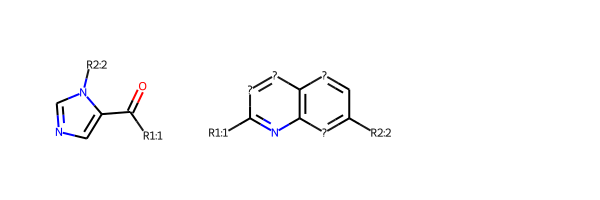

In [13]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.NoAlignment
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

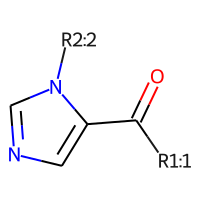
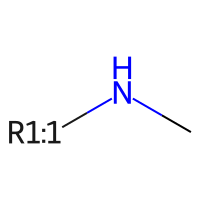
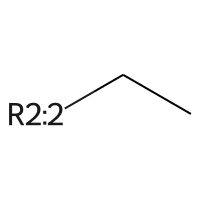
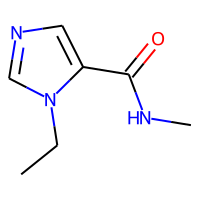
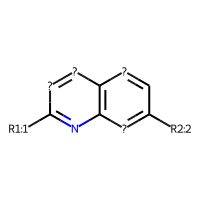
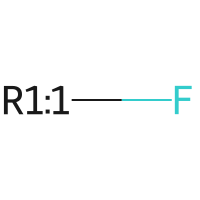
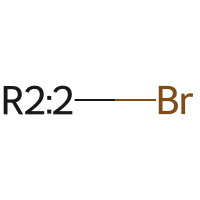
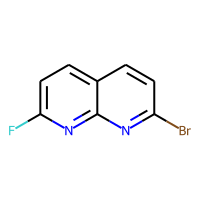

In [14]:
show_decomp(cols)

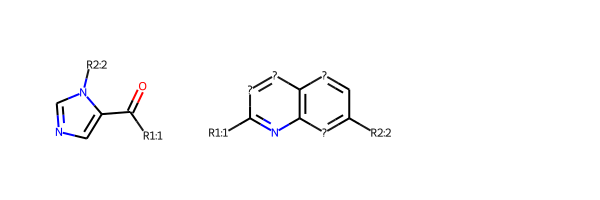

In [15]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.MDLRGroupLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.NoAlignment
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

,Core,R1,R2,mol
0,,,,
1,,,,

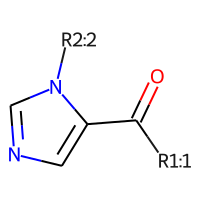
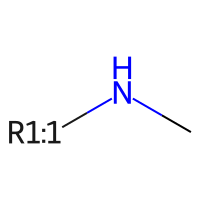
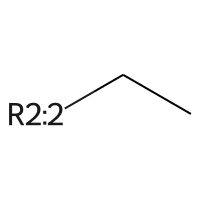
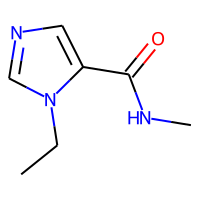
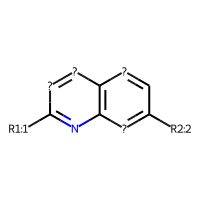
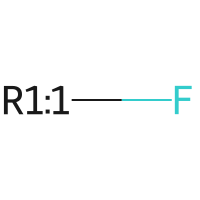
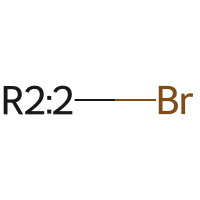
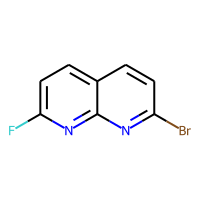

In [16]:
show_decomp(cols)

In [17]:
for core in cores:
    for atom in core.GetAtoms():
         if atom.HasProp("_MolFileRLabel"):
            atom.ClearProp("_MolFileRLabel")
         if atom.GetIsotope():
            atom.SetIsotope(0)
         if atom.GetAtomMapNum():
            print("atom map num")
            atom.SetAtomMapNum(0)
         

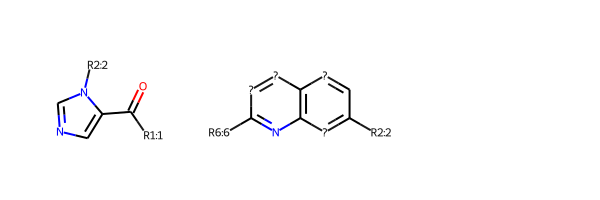

In [18]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.AutoDetect
options.alignment = RGroupCoreAlignment.MCS
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

In [19]:
show_decomp_smiles(cols)

,Core,R1,R2,R3,R4,R5,R6,mol
0,Core:O=C(c1cncn1[*:2])[*:1],R1:CN[*:1],R2:CC[*:2],R3:,R4:,R5:,R6:,mol:CCn1cncc1C(=O)NC
1,Core:c1c([*:2])[*:3]c2nc([*:6])[*:5]:[*:4]c2[*:1]1,R1:c(:[*:1]):[*:1],R2:Br[*:2],R3:n(:[*:3]):[*:3],R4:c(c:[*:5]):[*:4],R5:c(c:[*:5]):[*:4],R6:F[*:6],mol:Fc1ccc2ccc(Br)nc2n1


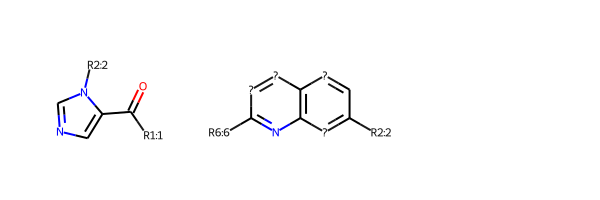

In [20]:
options = RGroupDecompositionParameters()
options.labels =  RGroupLabels.DummyAtomLabels | RGroupLabels.RelabelDuplicateLabels
options.alignment = RGroupCoreAlignment.MCS
cols=decomp(options)
Draw.MolsToGridImage(cols['Core'])

In [21]:
show_decomp_smiles(cols)

,Core,R1,R2,R3,R4,R5,R6,mol
0,Core:O=C(c1cncn1[*:2])[*:1],R1:CN[*:1],R2:CC[*:2],R3:,R4:,R5:,R6:,mol:CCn1cncc1C(=O)NC
1,Core:c1c([*:2])[*:3]c2nc([*:6])[*:5]:[*:4]c2[*:1]1,R1:c(:[*:1]):[*:1],R2:Br[*:2],R3:n(:[*:3]):[*:3],R4:c(c:[*:5]):[*:4],R5:c(c:[*:5]):[*:4],R6:F[*:6],mol:Fc1ccc2ccc(Br)nc2n1
